 ______  ___     ______                        _________
___   |/  /________  /_______ _______ ______________  /
__  /|_/ /_  __ \_  __ \  __ `/_  __ `__ \  _ \  __  / 
_  /  / / / /_/ /  / / / /_/ /_  / / / / /  __/ /_/ /  
/_/  /_/  \____//_/ /_/\__,_/ /_/ /_/ /_/\___/\__,_/   
                                                       
_____________ _________      ___________        _________            
___    |__  /_______  /_____ ___  /__  /_______ ______  /____________
__  /| |_  __ \  __  /_  __ `/_  /__  //_/  __ `/  __  /_  _ \_  ___/
_  ___ |  /_/ / /_/ / / /_/ /_  / _  ,<  / /_/ // /_/ / /  __/  /    
/_/  |_/_.___/\__,_/  \__,_/ /_/  /_/|_| \__,_/ \__,_/  \___//_/     
                                                                     
 


### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [3]:
df = pd.read_csv(r"ds_salaries.csv", index_col=0)

In [4]:
"""
experience_level -> EN = Entry-level 
                    MI = Mid-level 
                    SE = Senior-level 
                    EX = Expert

employment_type  -> PT = Part-time 
                    FT = Full-time 
                    CT = Contract 
                    FL = Freelance

company_size     -> S less than 50 employees (small) 
                    M 50 to 250 employees (medium) 
                    L more than 250 employees (large)
"""

df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### Data Handling

In [5]:
df["experience_level"].replace({"EN":"Entry-level", "MI":"Mid-level", "SE":"Senior-level", "EX":"Executive-level"}, inplace=True)
df["employment_type"].replace({"PT":"Part-time", "FT":"Full-time", "CT":"Contract", "FL":"Freelance"}, inplace=True)
df["remote_ratio"].replace({0:"No remote", 50:"Partially remote", 100:"Fully remote"}, inplace=True)

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,No remote,DE,L
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,No remote,JP,S
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,Partially remote,GB,M
3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,HN,No remote,HN,S
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,Partially remote,US,L


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    object
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(3), object(8)
memory usage: 56.9+ KB


In [7]:
print("Column Unique Values \n")

for col in df.columns:
    print(f"{str(col).ljust(20)} - ", len(df[col].unique()))

Column Unique Values 

work_year            -  3
experience_level     -  4
employment_type      -  4
job_title            -  50
salary               -  272
salary_currency      -  17
salary_in_usd        -  369
employee_residence   -  57
remote_ratio         -  3
company_location     -  50
company_size         -  3


### Data Visualization

In [8]:
# df["employment_type"].value_counts()
df.groupby("employment_type").sum()["salary_in_usd"].sort_values()

employment_type
Freelance      192000
Part-time      330705
Contract       922875
Full-time    66719227
Name: salary_in_usd, dtype: int64

<AxesSubplot:xlabel='employment_type', ylabel='Count'>

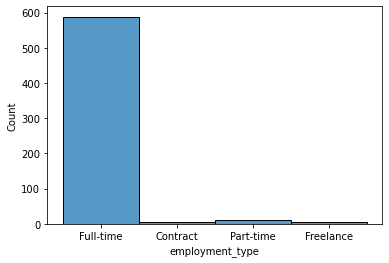

In [9]:
sns.histplot(df["employment_type"])

Total Salary by employment_type (USD)


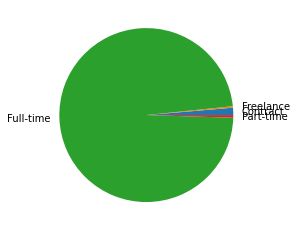

Contract   :   922875 $
Freelance  :   192000 $
Full-time  : 66719227 $
Part-time  :   330705 $


In [10]:
print(f"Total Salary by employment_type (USD)")

employment_type = []
employment_type_count = [] 
      
for group, sub_df in df.groupby("employment_type"):
    employment_type.append(group)
    employment_type_count.append(sub_df["salary_in_usd"].sum())

plt.pie(employment_type_count, labels=employment_type) 
plt.show() 

for emp_type, count in zip(employment_type, employment_type_count):
    print(f"{str(emp_type).ljust(10)} : {str(count).rjust(8)} $")

## 

Number of Salary Currency


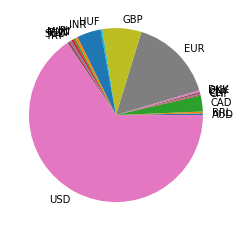

AUD  :    2 
BRL  :    2 
CAD  :   18 
CHF  :    1 
CLP  :    1 
CNY  :    2 
DKK  :    2 
EUR  :   95 
GBP  :   44 
HUF  :    2 
INR  :   27 
JPY  :    3 
MXN  :    2 
PLN  :    3 
SGD  :    2 
TRY  :    3 
USD  :  398 


In [11]:
print(f"Number of Salary Currency")

salary_currency = []
salary_currency_count = [] 
      
for group, sub_df in df.groupby("salary_currency"):
    salary_currency.append(group)
    salary_currency_count.append(len(sub_df))

plt.pie(salary_currency_count, labels=salary_currency) 
plt.show() 

for emp_type, count in zip(salary_currency, salary_currency_count):
    print(f"{str(emp_type).ljust(4)} : {str(count).rjust(4)} ")

The currency of the salary paid


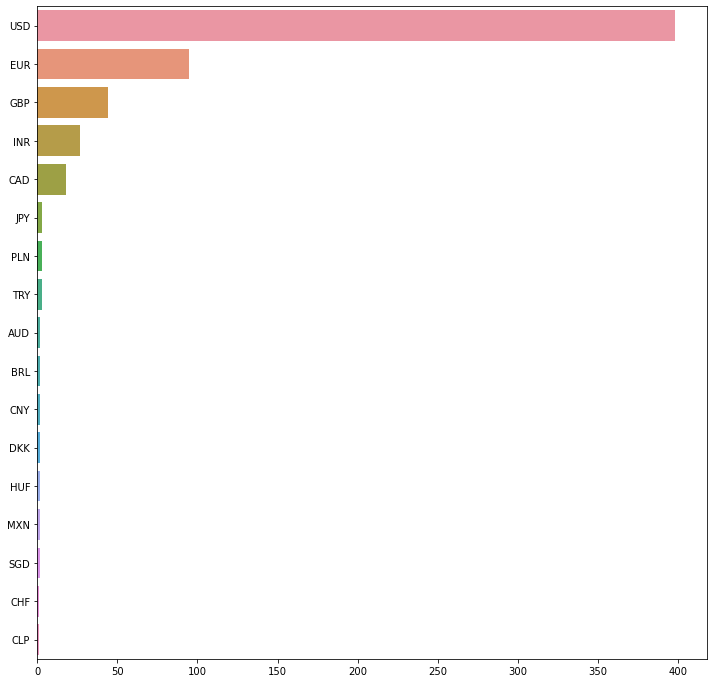

USD  :  398 
EUR  :   95 
GBP  :   44 
INR  :   27 
CAD  :   18 
JPY  :    3 
PLN  :    3 
TRY  :    3 
AUD  :    2 
BRL  :    2 
CNY  :    2 
DKK  :    2 
HUF  :    2 
MXN  :    2 
SGD  :    2 
CHF  :    1 
CLP  :    1 


In [12]:
print(f"The currency of the salary paid")

salary_currency_dict = dict()

for group, sub_df in df.groupby("salary_currency"):
    salary_currency_dict[group] = len(sub_df)
    
salary_currency_dict = dict(sorted(salary_currency_dict.items(), key=lambda item: item[1], reverse=True))

fig, ax =plt.subplots(1,1 , figsize = (12,12))
sns.barplot(y=list(salary_currency_dict.keys()), x=list(salary_currency_dict.values()))
plt.show()



for currency, count in salary_currency_dict.items():
    print(f"{str(currency).ljust(4)} : {str(count).rjust(4)} ")

## 

<AxesSubplot:xlabel='remote_ratio', ylabel='Count'>

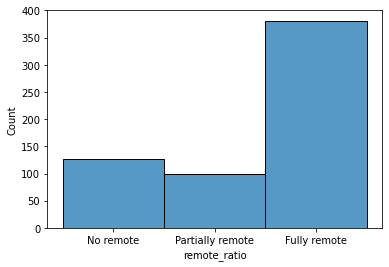

In [13]:
sns.histplot(df["remote_ratio"])

Total Remote Employee Number by Year


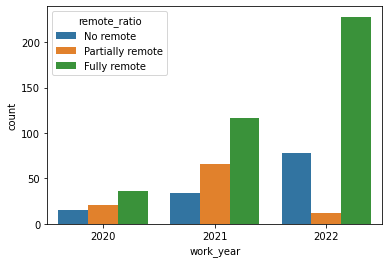

In [14]:
print(f"Total Remote Employee Number by Year")

sns.countplot(data = df, x = 'work_year',hue = 'remote_ratio')
plt.show()

## 

Average Salaries by Job Title


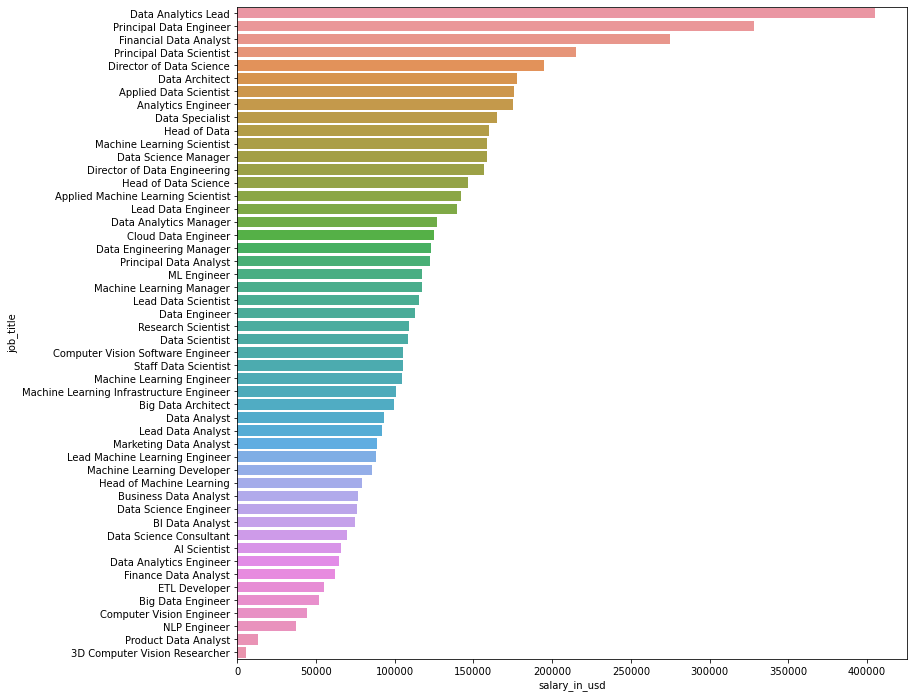

In [15]:
print(f"Average Salaries by Job Title")

job_titles = df.groupby('job_title')['salary_in_usd'].mean()
job_titles_df = job_titles.reset_index()
job_titles_df.sort_values(by='salary_in_usd', inplace=True, ascending= False)

fig, ax =plt.subplots(1,1 , figsize = (12,12))

sns.barplot(y=job_titles_df['job_title'], x=job_titles_df['salary_in_usd'])
plt.show()

In [16]:
# df.to_csv("Salaries2.csv")